# Demonstration of the IBCAO class

## Plot map with some data on it

### Load necessary Python modules

In [1]:
# This is designed to be run from the doc/ directory
import sys
sys.path.append ('..')

In [5]:
# load matplotlib and cartopy
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# load the IBCAO class
from ibcao import *

### Set up the basic IBCAO figure

ibcao read, shape: (11617, 11617)


/usr/lib/python3.6/site-packages/scipy/io/netcdf.py:299: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


<IPython.core.display.Javascript object>


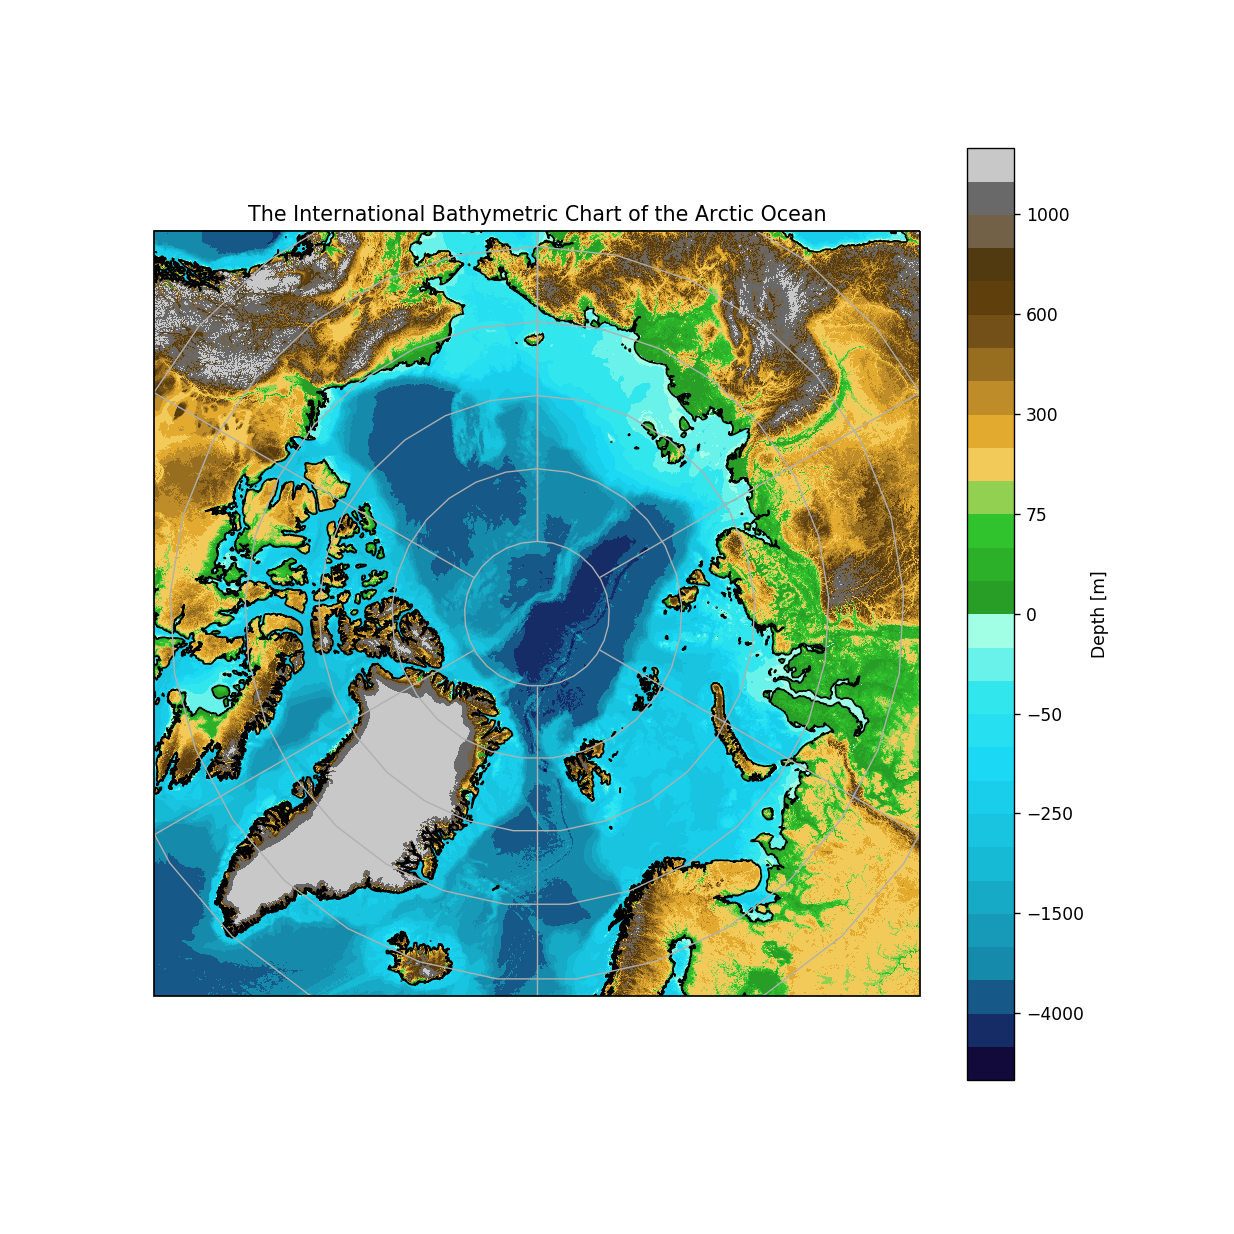

In [11]:
i = IBCAO ()
f = i.template ()
f.set_size_inches (10,10)
plt.show ()

## We will get a warning about an open netcdf file, this is caused by the map data being memory-mapped
## so that only the necessary data is loaded. See https://github.com/gauteh/ibcao_py/issues/1 for more
## information.

### And let us add some metadata to the map...

<IPython.core.display.Javascript object>


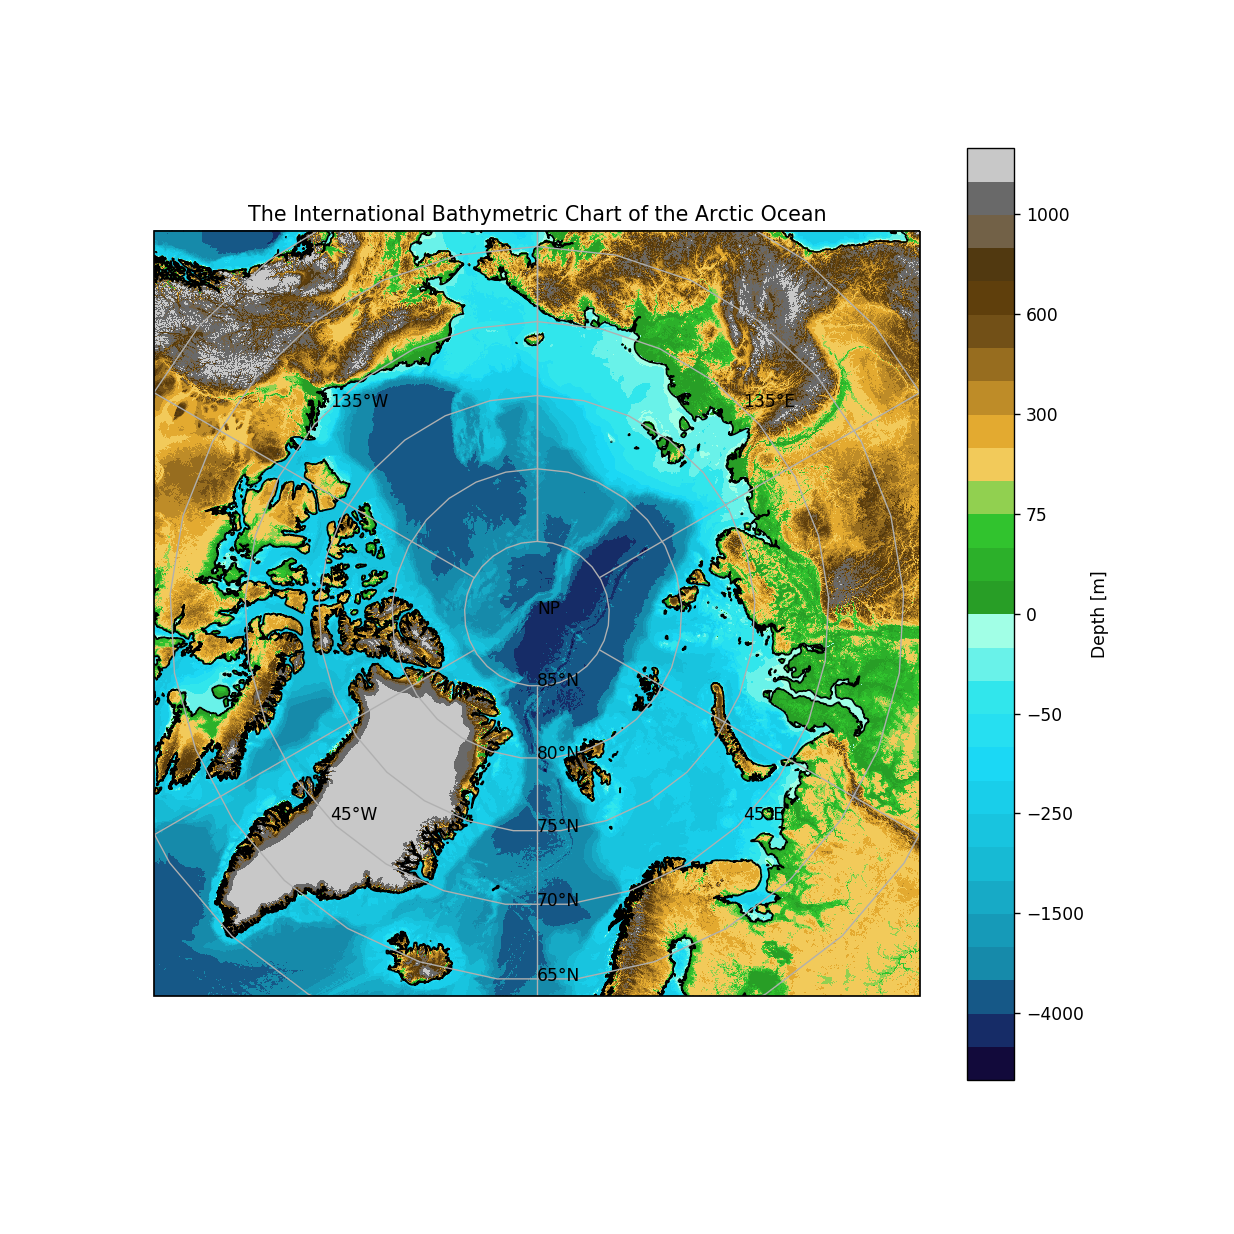

In [10]:
f = i.template ()
f.set_size_inches (10,10)

# lets put some text along the parallels
lat = np.arange (65, 90, 5)
lon = np.repeat (0, len(lat))

# regular lat, lon projection
g = ccrs.Geodetic ()

for lon, lat in zip (lon, lat):
    plt.text (lon, lat, LATITUDE_FORMATTER.format_data(lat), transform = g)

# and some text along the meridians
lon = [-45, 45, 135, -135]
lat = np.repeat (70, len(lon))

for lon, lat in zip (lon, lat):
    plt.text (lon, lat, LONGITUDE_FORMATTER.format_data(lon), transform = g)

# also; the north pole
plt.text (0, 90, "NP", transform = g)
plt.show ()
